In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from astroML.classification import GMMBayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix
from astroML.utils import split_samples, completeness_contamination
import corner
import warnings
warnings.simplefilter('ignore')

In [19]:
data = pd.read_csv("../solutions/galaxyquasar.csv")
data

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [20]:
u_g = np.array(data['u'] - data['g'])
g_r = np.array(data['g'] - data['r'])
r_i = np.array(data['r'] - data['i'])
i_z = np.array(data['i'] - data['z'])

In [21]:
le = LabelEncoder()

#Assign unique integers: 1 QSO, 0 galaxy
data['class'] = le.fit_transform(data['class']) 
label_class = le.inverse_transform(data['class'])
class_name = le.classes_
print('Class names: ', class_name)
print('Labels: ', label_class)

Class names:  ['GALAXY' 'QSO']
Labels:  ['QSO' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


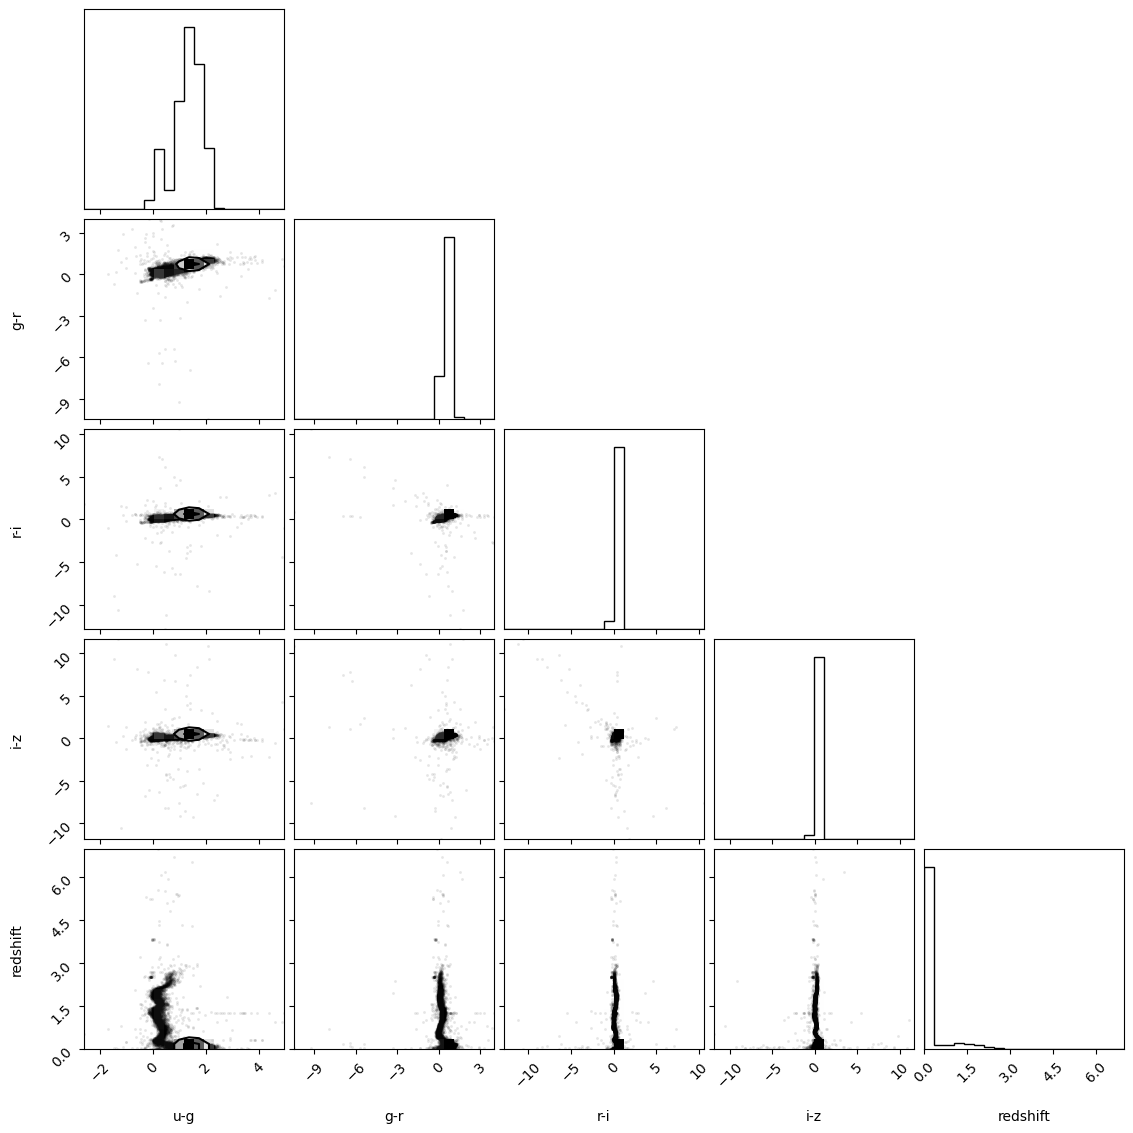

In [61]:
corner.corner(np.array([u_g, g_r, r_i, i_z, data['z1']]).T, labels=['u-g', 'g-r', 'r-i', 'i-z', 'redshift']);

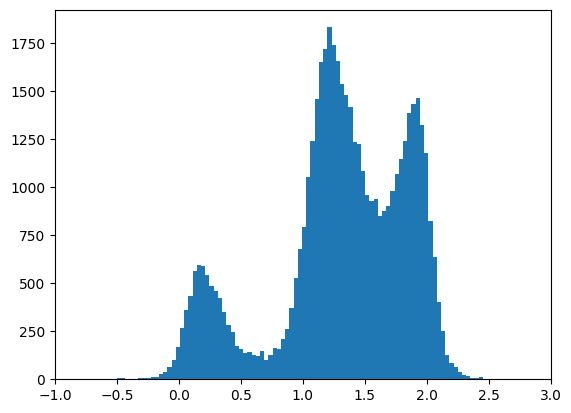

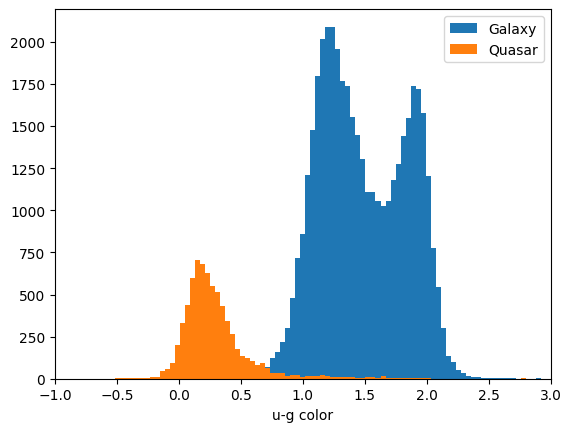

In [25]:
plt.hist(u_g, bins = int(np.sqrt(len(u_g))))
plt.xlim(-1,3)
plt.show()

plt.hist(u_g[data['class'] == 0], bins = np.linspace(-1,3,100), label = 'Galaxy')
plt.hist(u_g[data['class'] == 1], bins = np.linspace(-1,3,100), label = 'Quasar')
plt.legend()
plt.xlim(-1,3)
plt.xlabel('u-g color')
plt.show()

In [26]:
x = np.array([u_g, g_r, r_i, i_z]).T
x_train, x_test, y_train, y_test = train_test_split(x, data['class'], test_size=0.3, random_state=42)

# Gaussian Naive Bayes

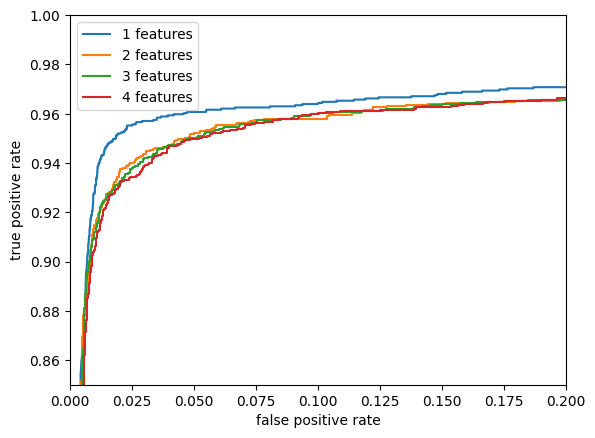

In [37]:
clf = GaussianNB()

for i in range(4):

    clf.fit(x_train[:,0:i+1] ,y_train )

    y_proba = clf.predict_proba(x_test[:,0:i+1]) [:,1] 
    
    
    fpr_GNB, tpr_GNB, thresh_GNB = roc_curve(y_test, y_proba)
    precision_GNB, recall_GNB, thresh2_GNB = precision_recall_curve(y_test, y_proba)
    
    plt.plot(fpr_GNB, tpr_GNB, label=str(i+1) + ' features')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.xlim(0, 0.2)
    plt.ylim(0.85, 1)

plt.legend()

# Linear Discriminant Analysis

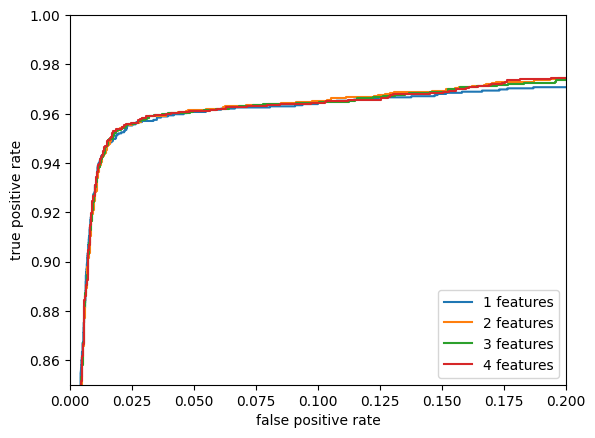

In [38]:
clf = LinearDiscriminantAnalysis()

for i in range(4):

    clf.fit(x_train[:,0:i+1] ,y_train )

    y_proba = clf.predict_proba(x_test[:,0:i+1]) [:,1] 
    
    
    fpr_LDA, tpr_LDA, thresh_LDA = roc_curve(y_test, y_proba)
    precision_LDA, recall_LDA, thresh2_LDA = precision_recall_curve(y_test, y_proba)
    
    plt.plot(fpr_LDA, tpr_LDA, label=str(i+1) + ' features')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.xlim(0, 0.2)
    plt.ylim(0.85, 1)

plt.legend()

# Quadratic Discriminant Analysis

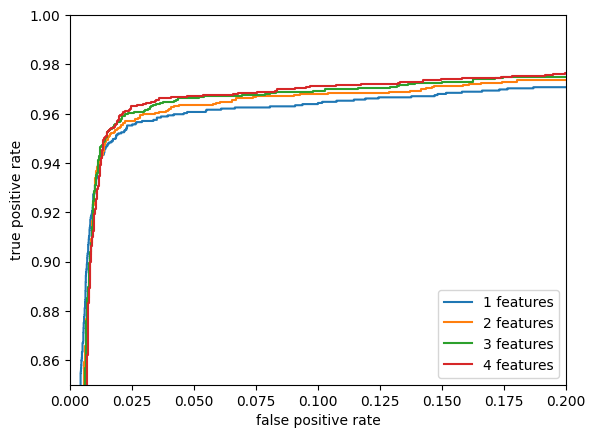

In [39]:
clf = QuadraticDiscriminantAnalysis()

for i in range(4):

    clf.fit(x_train[:,0:i+1] ,y_train )

    y_proba = clf.predict_proba(x_test[:,0:i+1]) [:,1] 
    
    
    fpr_QDA, tpr_QDA, thresh_QDA = roc_curve(y_test, y_proba)
    precision_QDA, recall_QDA, thresh2_QDA = precision_recall_curve(y_test, y_proba)
    
    plt.plot(fpr_QDA, tpr_QDA, label=str(i+1) + ' features')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.xlim(0, 0.2)
    plt.ylim(0.85, 1)

plt.legend()

# K Neighbors Classifier

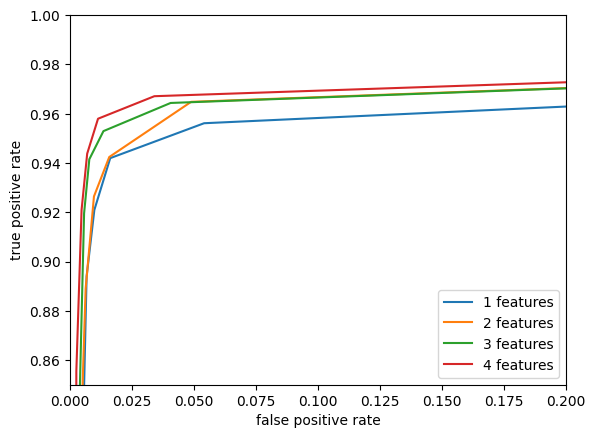

In [41]:
clf = KNeighborsClassifier()

for i in range(4):

    clf.fit(x_train[:,0:i+1] ,y_train )

    y_proba = clf.predict_proba(x_test[:,0:i+1]) [:,1] 
    
    
    fpr_KNC, tpr_KNC, thresh_KNC = roc_curve(y_test, y_proba)
    precision_KNC, recall_KNC, thresh2_KNC = precision_recall_curve(y_test, y_proba)
    
    plt.plot(fpr_KNC, tpr_KNC, label=str(i+1) + ' features')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.xlim(0, 0.2)
    plt.ylim(0.85, 1)

plt.legend()

We can notce that, generally, increasing the number of features improves the result of the classification. For the Gaussian Naive Bayes classifier, instead, we reach the best performance using only the 'u-g' color.

# GMM Bayes

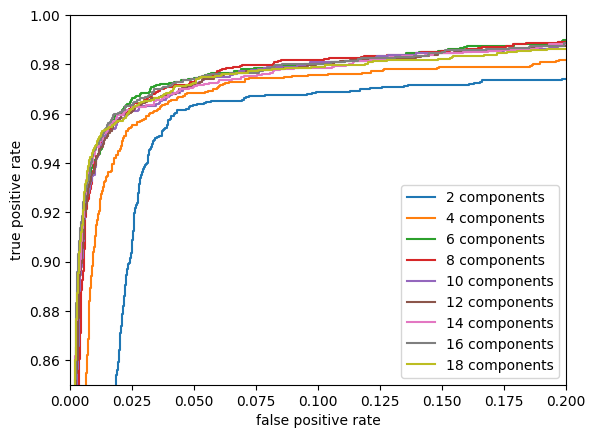

In [51]:
for n in np.arange(2,20)[::2]:
    
    clf = GMMBayes(n_components = n)
    
    clf.fit(x_train[:,0:4] ,y_train )

    y_proba = clf.predict_proba(x_test[:,0:4]) [:,1] 
    
    
    fpr_GMMB, tpr_GMMB, thresh_GMMB = roc_curve(y_test, y_proba)
    precision_GMMB, recall_GMMB, thresh2_GMMB = precision_recall_curve(y_test, y_proba)
    
    plt.plot(fpr_GMMB, tpr_GMMB, label=str(n) + ' components')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.xlim(0, 0.2)
    plt.ylim(0.85, 1)

plt.legend()

Using the GMM Bayes classifier, we can notice that increasing the number of components we improve the performance of the classification, but from n = 6 the roc curve is pretty the same.

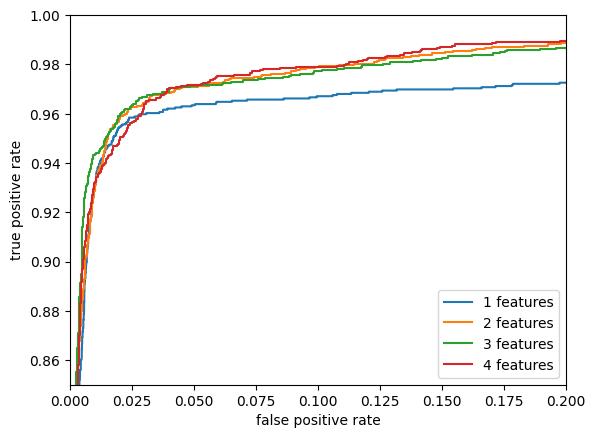

In [52]:
clf = GMMBayes(n_components = 6)

for i in range(4):

    clf.fit(x_train[:,0:i+1] ,y_train )

    y_proba = clf.predict_proba(x_test[:,0:i+1]) [:,1] 
    
    
    fpr_GMMB, tpr_GMMB, thresh_GMMB = roc_curve(y_test, y_proba)
    precision_GMMB, recall_GMMB, thresh2_GMMB = precision_recall_curve(y_test, y_proba)
    
    plt.plot(fpr_GMMB, tpr_GMMB, label=str(i+1) + ' features')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.xlim(0, 0.2)
    plt.ylim(0.85, 1)

plt.legend()

Also in this case the performance is better increasing the number of components.

# Let's visualize the classification result

We'll use the GMM Bayes with 6 components on all the 4 features.

In [53]:
clf = GMMBayes(n_components = 6)

clf.fit(x_train[:,0:4], y_train)

y_pred = clf.predict(x_test[:,0:4]) 

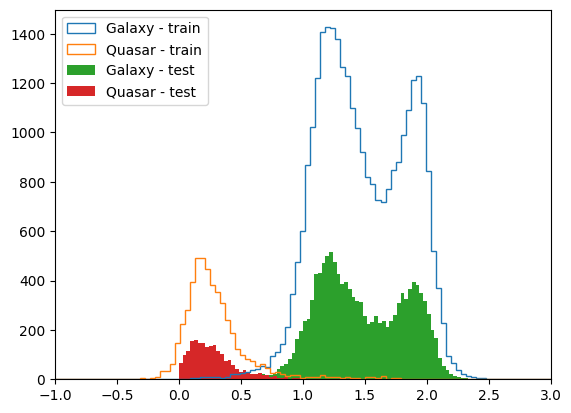

In [56]:
plt.hist(x_train[:,0][y_train == 0], histtype='step', bins = np.linspace(-1,3,100), label = 'Galaxy - train')
plt.hist(x_train[:,0][y_train == 1], histtype='step', bins = np.linspace(-1,3,100), label = 'Quasar - train')

plt.hist(x_test[:,0][y_pred == 0], bins=np.linspace(0,3,100), label = 'Galaxy - test')
plt.hist(x_test[:,0][y_pred == 1], bins=np.linspace(0,3,100), label = 'Quasar - test')

plt.xlim(-1,3)
plt.legend()

# Using the redshift

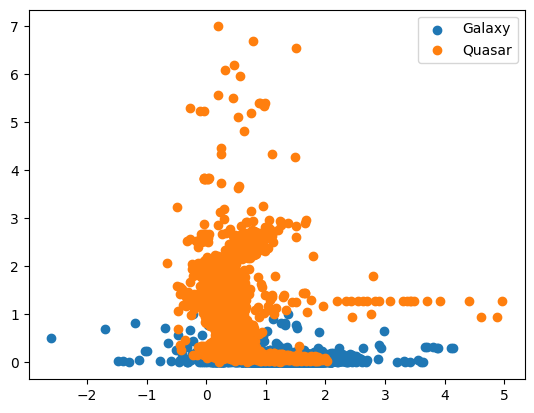

In [60]:
plt.scatter(u_g[data['class'] == 0], data['z1'][data['class'] == 0], label = 'Galaxy')
plt.scatter(u_g[data['class'] == 1], data['z1'][data['class'] == 1], label = 'Quasar')
plt.legend()

Here we see that galaxies are distributed only at low redshift, while quasars reaches redshift 7.

Since we have a bimodality in 'u-g' color of galaxies only, let's see if redshift tells us something.

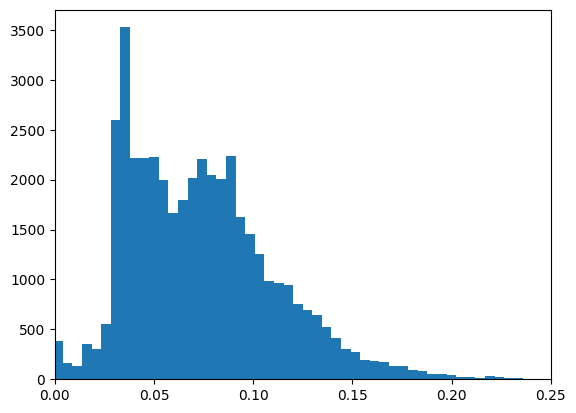

In [64]:
plt.hist(data['z1'][data['class'] == 0], bins = int(np.sqrt(len(data['z1'][data['class'] == 0]))))
plt.xlim(0,0.25);

We have bimodality also in galaxy's redshifts

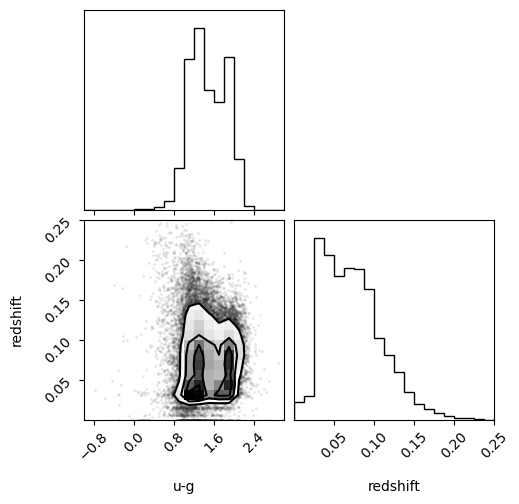

In [73]:
corner.corner(np.array([u_g[data['class'] == 0], data['z1'][data['class'] == 0]]).T, range = [(-1,3),(0,0.25)], labels=['u-g', 'redshift']);

This two variables seems to be uncorrelated.